### ESTUDO DIRIGIDO - SISTEMAS DE CONTROLE MODERNOS (8ª EDIÇÃO)
#### Alunos: Gabriel da Silva e Jhonatan Pereira

__Objetivo do estudo:__
O objetivo desde estudo é analisar o comportamento de um sistema de controle em malha fechada, utilizando o método de resposta em frequência, e comparar os resultados obtidos com os resultados obtidos através do método de resposta ao degrau.

In [1]:
# Instalando biblioteca python-control para simulação de sistemas de controle
%pip install control
# Importando a biblioteca control
import control as ctl
# Importando a biblioteca matplotlib para plotar gráficos
import matplotlib.pyplot as plt
# Importando a biblioteca numpy para cálculos matemáticos
import numpy as np

Note: you may need to restart the kernel to use updated packages.


#### Capítulo 4: **Características de sistemas de controle com retroação**

##### 4.7 Exemplo de projeto: Máquinas perfuratrizes do Canal da Mancha

__Resumo__:
O canal da Mancha é um braço de mar que faz parte do oceano Atlântico e que separa a ilha da Grã-Bretanha do norte da França e une o mar do Norte ao Atlântico.

A construção do túnel sob o Canal da Mancha da França para a Grã-Bretanha. O túnel tem um comprimento de 23,5 milhas e foi perfurado 200 pés abaixo do nível do mar. Após concluído, atende 50 viagens de trens diariamente. Esta construção incrementa a conexão Europa e Grã-Bretanha, tornando possível um trem chegar a Paris a partir de Londres em 3 horas.

O projeto do sistema de controle para a máquina perfuradora do túnel do Canal da Mancha é um exemplo de projeto de um sistema de controle de malha fechada. O sistema de controle é projetado para manter a velocidade e a direção da máquina perfuradora constantes, apesar de variações na carga devido a diferentes tipos de solo.

As máquinas que operaram de ambas as extremidades precisamente alinhadas por um sistema de orientação a laser. O objetivo do projeto é selecionar o ganho $K$ para que a resposta a mudanças no ângulo de entrada seja a desejável, mantendo, ao mesmo tempo, o erro mínimo devido a perturbalões, onde $Y(s)$ é o ângulo real da direção de deslocamento da máquina de perfurar e $R(s)$ é o ângulo desejado. O efeito de carga sobre a máquina é representado pela perturbação $D(s)$. Usando a fórmula de ganho do diagrama de fluxo de sinal de Mason, a saída devida às duas entradas será:

$$Y(s) = T(s)R(s) + T_d(s)D(s)$$
$$= \frac{K + 11s}{s^2+12s+K} R(s) + \frac{1}{s^2 + 12s + K} D(s).$$

In [ ]:
# Função de transferência da máquina de perfurar
def drilling_machine_transfer(
        s: ctl.TransferFunction,
        K: float,
        R_s: float,
        D_s: float
) -> float:
    """
    Função de transferência da máquina de perfurar.
    
    Args:
        s (float): Variável complexa da transformada de Laplace.
        K (float): Ganho do sistema.
        R_s (float): Ângulo de referência da direção de deslocamento da máquina de perfurar.
        D_s (float): Distúrbio na direção de deslocamento da máquina de perfurar.

    Returns:
        Y_s (float): Ângulo real da direção de deslocamento da máquina de perfurar.
    """
    # Definindo a função de transferência da máquina de perfurar
    T_s = (K + 11 * s) / (s**2 + 12 * s + K)
    Td_s = 1 / (s**2 + 12 * s + K)
    Y_s = T_s * R_s + Td_s * D_s

    return Y_s

response = ctl.step_response(
    drilling_machine_transfer(
        s=ctl.tf('s'),
        K=100,
        R_s=1,
        D_s=0
    )
)

output = response.outputs
time = response.time

plt.plot(time, output)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t) º', )
plt.title('Resposta ao degrau da máquina de perfurar\nK = 100, d(t) = 0')
plt.grid()
plt.show()

In [ ]:
response = ctl.step_response(
    drilling_machine_transfer(
        s=ctl.tf('s'),
        K=100,
        R_s=0.0001,
        D_s=1
    )
)

output = response.outputs
time = response.time

plt.plot(time, output)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t) º', )
plt.title('Resposta ao degrau da máquina de perfurar\nK = 100, d(t) = 1')
plt.grid()
plt.show()

In [ ]:
response = ctl.step_response(
    drilling_machine_transfer(
        s=ctl.tf('s'),
        K=20,
        R_s=0.95,
        D_s=1
    )
)

output = response.outputs
time = response.time

plt.plot(time, output)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t) º', )
plt.title('Resposta ao degrau da máquina de perfurar\nK = 20, d(t) = 1')
plt.grid()
plt.show()

#### 4.8 Exemplo de projeto: Veículo explorador de Marte

#### 4.9 Características de sistema de controle com o Matlab

In [2]:
# Exemplo de velocidade com tacômetro
Ra, Km, J, b, Kb = 1, 10, 2, 0.5, 0.1
num1 = [1]
den1 = [J, b]
num2 = [Km * Kb / Ra]
den2 = [1]

series = ctl.series(ctl.tf(num1, den1), ctl.tf(num2, den2))
# Calcular feedback negativo
feedback = ctl.feedback(series, sign=-1)
num, den = ctl.tfdata(feedback)
num = np.negative(num)
num, den

(array([[[-1.]]]), [[array([2. , 1.5])]])

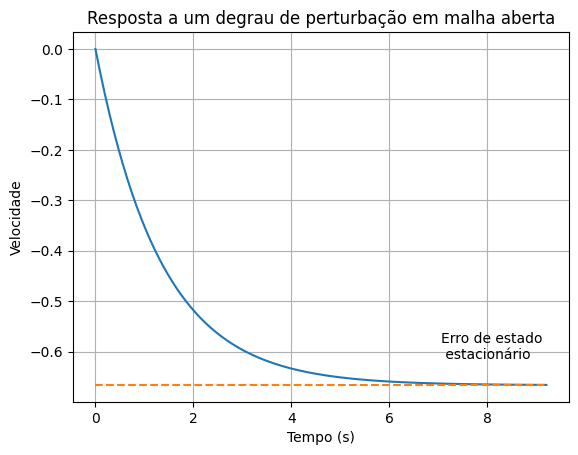

In [3]:
response = ctl.step_response(
    ctl.tf(num, den),
)

output = response.outputs
time = response.time

plt.plot(time, output)
plt.title('Resposta a um degrau de perturbação em malha aberta')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade')
plt.grid()
plt.plot(time, output[-1] * np.ones(len(time)), '--')
plt.figtext(.7, .2, "Erro de estado\n estacionário")
plt.show()

In [6]:
# Exemplo de velocidade com tacômetro
Ra, Km, J, b, Kb, Ka, Kt = 1, 10, 2, 0.5, 0.1, 54, 1
num1, den1 = [1], [J, b]
num2, den2 = [Ka * Kt], [1]
num3, den3 = [Kb], [1]
num4, den4 = [Km / Ra], [1]

parallel = ctl.parallel(num2, num3, den2, den3)
parallel2 = ctl.parallel(ctl.tf(num2, den2), ctl.tf(num3, den3))
numa, dena = ctl.tfdata(parallel)
series = ctl.series(ctl.tf(numa, dena), ctl.tf(num4, den4))
series2 = ctl.series(numa, dena, num4, den4)
numb, denb = ctl.tfdata(series)
series = ctl.series(ctl.tf(num1, den1), ctl.tf(numb, denb))
series2 = ctl.series(num1, den1, numb, denb)
feedback = ctl.feedback(series)
num, den = ctl.tfdata(feedback)
num = np.negative(num)
num, den

KeyboardInterrupt: 

In [ ]:
response = ctl.step_response(
    ctl.tf(num, den),
)

output = response.outputs
time = response.time

plt.plot(time, output)
plt.title('Resposta a um degrau de perturbação em malha fechada')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade [rad/s]')
plt.grid()
plt.plot(time, output[-1] * np.ones(len(time)), '--')
plt.figtext(.7, .2, "Erro de estado\n estacionário")
plt.show()

#### Capítulo 5: **O desempenho de sistemas de controle com retroação**

#### Capítulo 6: **A estabilidade de sistemas linares com retroação**

#### Capítulo 7: **O método do lugar das raízes**

#### Capítulo 10: **O projeto de sistemas de controle com retroação**

#### Capítulo 13: **Sistemas de controle digital**

In [ ]:

%pip install control